# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with United States data. 

It enables researchers to examine factors that affect earnings and educational attainment and has enormous policy relevance. It can also shed light on politically sensitive topics like the disparities in salaries and educational attainment between people of different sexes, ethnicities, and other characteristics. We can create better government policies when we have a better understanding of how these factors impact education and earnings.

<center><img src=https://img.freepik.com/premium-vector/businesswoman-analyst-working-with-laptop-corporate-data-analysis-accounting_88272-3974.jpg?w=2000 height=300></center>


### Upgrade Plotly

In [1]:
%pip install --upgrade plotly

     --------------------------------------- 15.2/15.2 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.9.0
    Uninstalling plotly-5.9.0:
      Successfully uninstalled plotly-5.9.0
Note: you may need to restart the kernel to use updated packages.


###  Preparing the Environment


In [2]:
import pandas as pd  # data structure and data analysis
import numpy as np # data arrays

import seaborn as sns # data visualization
import plotly.express as px # data visualization
import matplotlib.pyplot as plt # data visualization

from sklearn.linear_model import LinearRegression # regression
from sklearn.model_selection import train_test_split # test and training

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format # we stick to 2 decimal numbers

# Importing data set


In [4]:
# read_csv function to read the required CSV file
df = pd.read_csv('NLSY97_subset.csv')

### Understanding the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

[Variable Names and Column Descriptions]#pending link ()

# Preliminary Data Exploration 

**Challenge**

* What is the shape of `df`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df.shape # df has 2000 rows and 96 columns

(2000, 96)

In [7]:
df.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [8]:
print(f'There are {df.isna().any().sum()} columns with NaN values')

There are 16 columns with NaN values


In [9]:
print(f'There are {df.duplicated().sum()} duplicates in the dataset')

There are 513 duplicates in the dataset


In [ ]:
df.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,HHBMBF,HHBMOF,HHOMBF,HHBMONLY,HHBFONLY,HHOTHER,MSA97NO,MSA97NCC,MSA97CC,MSA97NK,ETHBLACK,ETHHISP,ETHWHITE,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO,PRMONM,PRMONF,PRMSTYUN,PRMSTYPE,PRMSTYAN,PRMSTYAE,PRFSTYUN,PRFSTYPE,...,ASVABNO,ASVABCS,ASVABC,ASVABC4,VERBAL,ASVABMV,HEIGHT,WEIGHT04,WEIGHT11,SF,SM,SFR,SMR,SIBLINGS,REG97NE,REG97NC,REG97S,REG97W,RS97RURL,RS97URBN,RS97UNKN,JOBS,HOURS,TENURE,CATGOV,CATPRI,CATNPO,CATMIS,CATSE,COLLBARG,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",402.00,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,14.00,14.00,0.00,0.00,0.00,1.00,0.00,0.00,...,-0.36,-0.72,-0.21,-0.32,-0.53,29818,70,155,186,12,12,12.00,12.00,1,0,0,1,0,0,1,0,6.00,50,4.77,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",38.00,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,12.00,12.00,0.00,0.00,0.00,1.00,0.00,0.00,...,-1.21,-0.17,0.13,-0.14,-0.21,46246,74,200,200,16,12,16.00,12.00,3,0,0,1,0,0,1,0,nan,50,9.06,0,0,0,1,0,0,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",555.00,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,nan,nan,nan,nan,nan,nan,nan,nan,...,0.06,-0.07,0.51,0.48,0.54,66480,72,168,190,16,6,nan,6.00,1,0,0,0,1,0,1,0,3.00,65,4.98,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,nan,nan,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,6.00,4.00,0.00,1.00,0.00,0.00,1.00,0.00,...,1.68,0.32,0.37,0.16,-0.05,51240,73,153,175,14,14,14.00,14.00,2,0,1,0,0,1,0,0,10.00,40,1.02,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",278.00,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,11.00,8.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.22,0.22,1.15,1.07,0.59,89773,71,145,170,14,16,14.00,16.00,1,0,0,0,1,0,1,0,7.00,40,2.35,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
df.tail()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,HHBMBF,HHBMOF,HHOMBF,HHBMONLY,HHBFONLY,HHOTHER,MSA97NO,MSA97NCC,MSA97CC,MSA97NK,ETHBLACK,ETHHISP,ETHWHITE,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO,PRMONM,PRMONF,PRMSTYUN,PRMSTYPE,PRMSTYAN,PRMSTYAE,PRFSTYUN,PRFSTYPE,...,ASVABNO,ASVABCS,ASVABC,ASVABC4,VERBAL,ASVABMV,HEIGHT,WEIGHT04,WEIGHT11,SF,SM,SFR,SMR,SIBLINGS,REG97NE,REG97NC,REG97S,REG97W,RS97RURL,RS97URBN,RS97UNKN,JOBS,HOURS,TENURE,CATGOV,CATPRI,CATNPO,CATMIS,CATSE,COLLBARG,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
1995,2456,14.00,8,7.87,1,0,1982,29,19.00,"6,000.00",38.00,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0.00,nan,1.00,0.00,0.00,0.00,nan,nan,...,0.09,0.46,0.19,0.03,0.25,53969,62,140,125,12,12,nan,12.00,4,1,0,0,0,0,1,0,3.00,40,5.12,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0
1996,1119,14.83,18,1.92,1,0,1983,28,28.00,"50,000.00",314.00,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,9.00,3.00,1.00,0.00,0.00,0.00,1.00,0.00,...,0.26,1.10,0.83,0.80,1.22,76267,67,182,250,12,12,12.00,12.00,1,1,0,0,0,0,1,0,9.00,40,1.10,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
1997,3561,35.88,18,2.67,1,0,1984,27,29.00,"77,610.00",488.00,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,12.00,nan,0.00,0.00,0.00,1.00,nan,nan,...,1.70,0.91,1.20,1.27,1.60,94859,69,161,141,16,16,16.00,16.00,1,0,0,1,0,0,1,0,8.00,40,4.25,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
1998,5980,25.48,16,4.71,1,0,1982,29,23.00,"69,300.00",549.00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,8.00,6.00,0.00,0.00,1.00,0.00,0.00,0.00,...,-1.30,-0.56,-0.20,-0.18,-0.15,41186,67,135,140,12,17,12.00,17.00,0,0,0,1,0,0,1,0,7.00,50,4.10,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1999,6221,13.33,14,6.48,1,0,1984,27,30.00,"40,020.00",317.00,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,10.00,11.00,1.00,0.00,0.00,0.00,0.00,1.00,...,0.93,1.76,0.33,0.29,0.60,66251,66,160,210,14,12,14.00,nan,1,0,0,1,0,1,0,0,4.00,60,2.19,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0


## Data Cleaning - Check for Missing Values and Duplicates



In [10]:
# Drop all duplicates
df.drop_duplicates(inplace=True)

In [11]:
# Get columns with NaN values to figure out what to do with them
df.columns[df.isna().any()]

Index(['AGEMBTH', 'HHINC97', 'POVRAT97', 'PRMONM', 'PRMONF', 'PRMSTYUN',
       'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE', 'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN',
       'PRFSTYAE', 'SFR', 'SMR', 'JOBS'],
      dtype='object')

In [12]:
# We can't fill the Age of Mother on birth, so we'll just drop the rows with nan columns in AGEMBTH
df.dropna(subset=['AGEMBTH'], inplace=True)

In [13]:
# I think its safe to assume that nan means they're unmonitored by either parents
df['PRMONM'].fillna(0, inplace=True)
df['PRMONF'].fillna(0, inplace=True)
# For parent's style, they might not have parents anymore, or they don't remember.
df['PRMSTYUN'].fillna(0, inplace=True)
df['PRMSTYPE'].fillna(0, inplace=True)
df['PRMSTYAN'].fillna(0, inplace=True)
df['PRMSTYAE'].fillna(0, inplace=True)
df['PRFSTYUN'].fillna(0, inplace=True)
df['PRFSTYPE'].fillna(0, inplace=True)
df['PRFSTYAN'].fillna(0, inplace=True)
df['PRFSTYAE'].fillna(0, inplace=True)

In [14]:
# I'll fill out the SFR and SMR with their respective SF and SM
df['SFR'].fillna(df['SF'], inplace=True)
df['SMR'].fillna(df['SM'], inplace=True)

In [15]:
# I think that those with NaN jobs probably only has one job, since they did earn money, and has tenure of?
df['JOBS'].fillna(1, inplace=True)

In [16]:
# Its most likely that at 1997, those people haven't got any household income, therefore we can fill them with
df['HHINC97'].fillna(0, inplace=True)
df['POVRAT97'].fillna(0, inplace=True)

## Descriptive Statistics

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1995
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1453 non-null   int64  
 1   EARNINGS  1453 non-null   float64
 2   S         1453 non-null   int64  
 3   EXP       1453 non-null   float64
 4   FEMALE    1453 non-null   int64  
 5   MALE      1453 non-null   int64  
 6   BYEAR     1453 non-null   int64  
 7   AGE       1453 non-null   int64  
 8   AGEMBTH   1453 non-null   float64
 9   HHINC97   1453 non-null   float64
 10  POVRAT97  1453 non-null   float64
 11  HHBMBF    1453 non-null   int64  
 12  HHBMOF    1453 non-null   int64  
 13  HHOMBF    1453 non-null   int64  
 14  HHBMONLY  1453 non-null   int64  
 15  HHBFONLY  1453 non-null   int64  
 16  HHOTHER   1453 non-null   int64  
 17  MSA97NO   1453 non-null   int64  
 18  MSA97NCC  1453 non-null   int64  
 19  MSA97CC   1453 non-null   int64  
 20  MSA97NK   1453 non-null   int6

In [18]:
df.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,453.00","1,453.00","1,453.00","1,453.00","1,453.00","1,453.00","1,453.00","1,453.00","1,453.00","1,453.00",...,"1,453.00","1,453.00","1,453.00","1,453.00","1,453.00","1,453.00","1,453.00","1,453.00","1,453.00","1,453.00"
mean,"3,548.23",18.85,14.57,6.70,0.49,0.51,"1,982.07",28.93,26.32,"47,837.59",...,0.77,0.16,0.27,0.34,0.23,0.05,0.54,0.42,0.00,0.00
std,"2,000.85",12.03,2.77,2.85,0.50,0.50,1.38,1.38,5.08,"45,823.52",...,0.43,0.36,0.45,0.47,0.42,0.21,0.50,0.49,0.05,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,905.00",11.50,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"14,468.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,470.00",15.79,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"42,200.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,163.00",22.60,17.00,8.69,1.00,1.00,"1,983.00",30.00,30.00,"66,750.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,978.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


## Visualise the Features

### Educational Qualifications vs Earnings

In [19]:
def get_highest_education(df):
  highest_education = []
  for idx, row in df.iterrows():
    result = ''
    if row['EDUCPROF']:
      result='Professional Degree'
    elif row['EDUCPHD']:
      result='Doctorate'
    elif row['EDUCMAST']:
      result="Master's Degree"
    elif row['EDUCBA']:
      result="Bachelor's Degree"
    elif row['EDUCAA']:
      result= "Associate's Degree"
    elif row['EDUCHSD']:
      result='Highschool Graduate'
    elif row['EDUCGED']:
      result='GED Certificate'
    elif row['EDUCDO']:
      result='High School Dropout'
    else:
      result=None
    highest_education.append(result)
  return highest_education

In [20]:
df['HEDQ'] = get_highest_education(df)

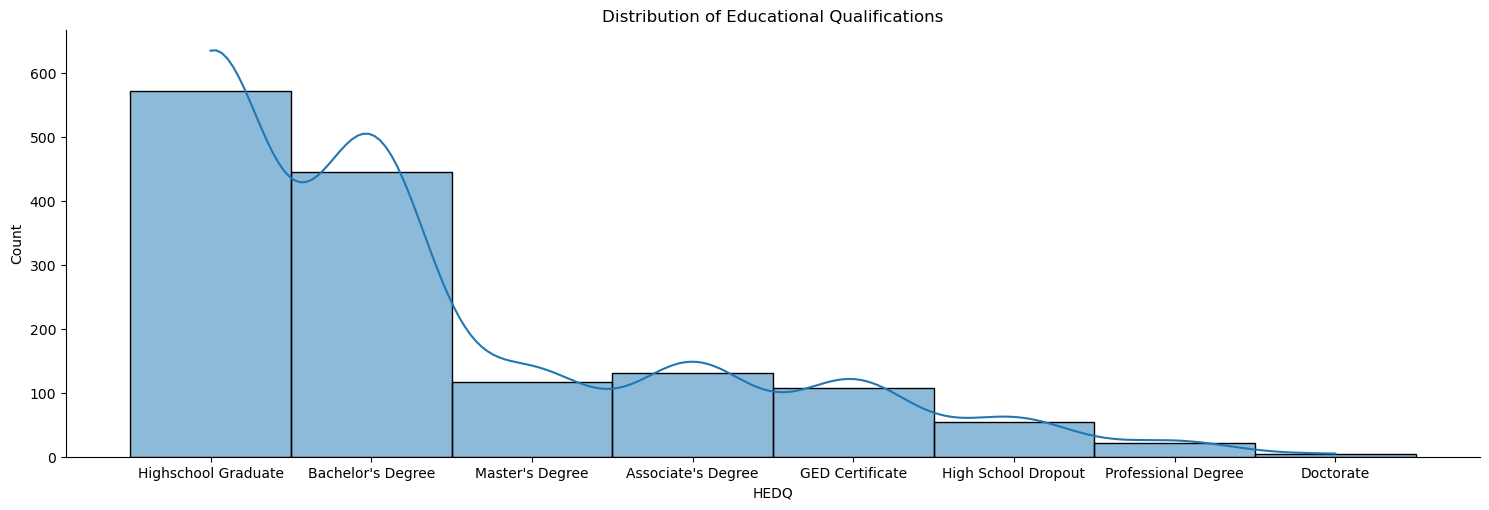

In [21]:
sns.displot(
    df, 
    x='HEDQ', 
    kde=True,
    height=5,
    aspect=3
).set(
    title='Distribution of Educational Qualifications'
)

In [22]:
by_education = df.groupby('HEDQ')['EARNINGS'].mean()
by_education

HEDQ
Associate's Degree    18.03
Bachelor's Degree     21.58
Doctorate             29.41
GED Certificate       12.54
High School Dropout   13.67
Highschool Graduate   16.57
Master's Degree       24.66
Professional Degree   38.01
Name: EARNINGS, dtype: float64

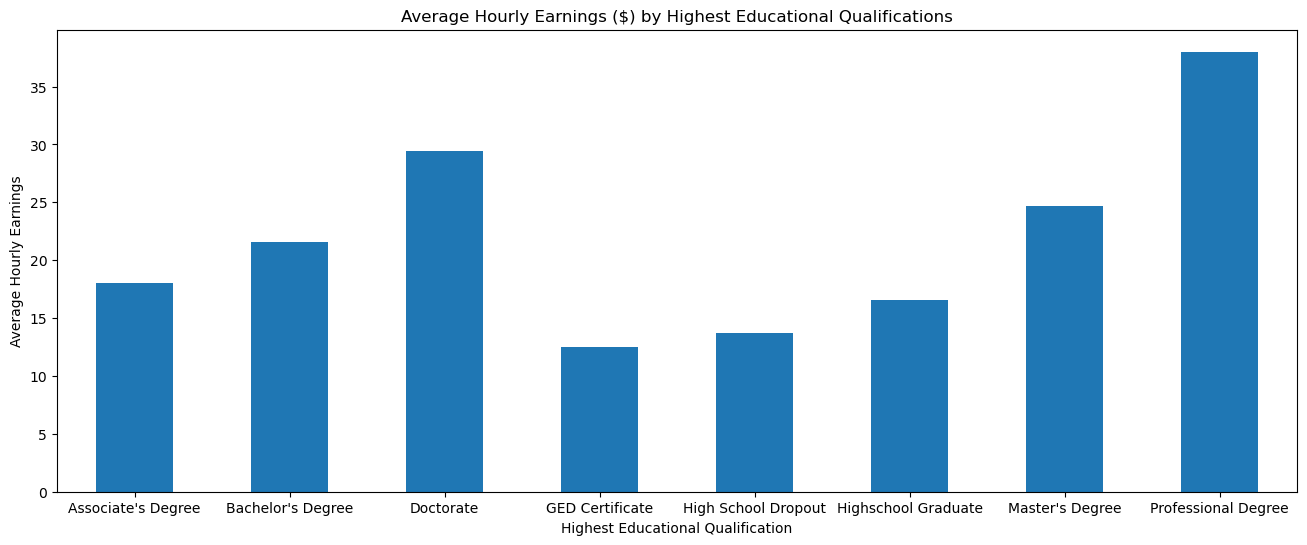

In [23]:
by_education.plot(
    kind = 'bar',
    figsize = (16,6),
    title = 'Average Hourly Earnings ($) by Highest Educational Qualifications',
    rot=0
)

plt.xlabel('Highest Educational Qualification')
plt.ylabel('Average Hourly Earnings')

plt.show()

In general, higher educational qualifications results in higher earnings.

### Years of Schooling vs Earnings

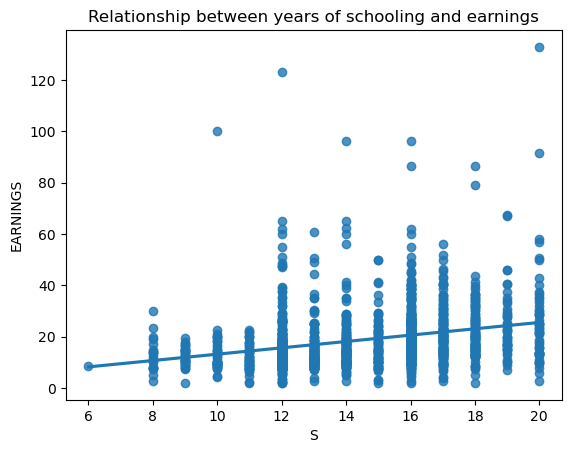

In [44]:
sns.regplot(data = df,x='S',y='EARNINGS', ci = None).set(title='Relationship between years of schooling and earnings')
sns.color_palette("hls", 8)
plt.show()

### Work Related Variables vs Earnings


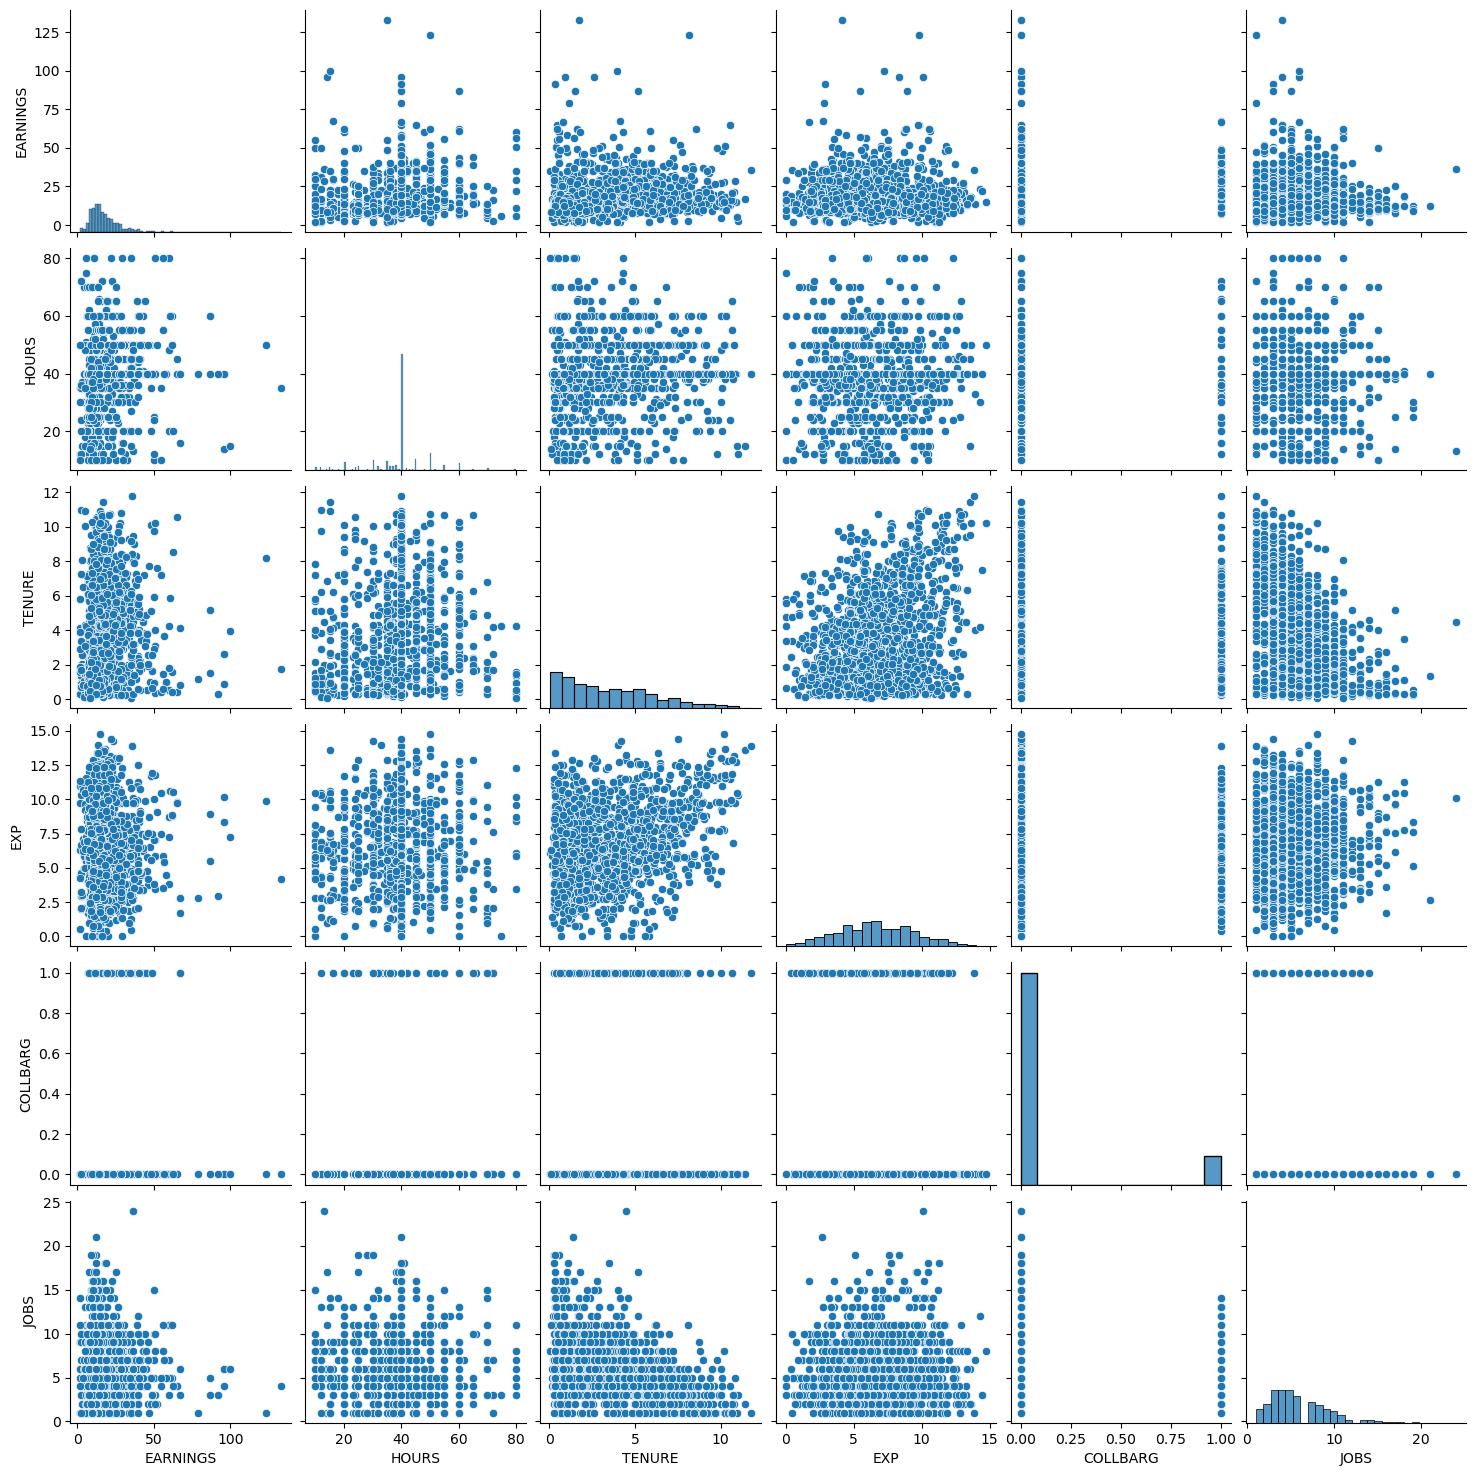

In [45]:
sns.pairplot(df, vars=['EARNINGS', 'HOURS', 'TENURE', 'EXP', 'COLLBARG', 'JOBS'])
plt.show()

# Split Training & Test Dataset

We can't use all the entries in our dataset to train our model. Keep 25% of the data for later as a testing dataset.  

In [124]:

x_train, x_test, y_train, y_test = train_test_split(
    df[['S','EXP']],
    df['EARNINGS'],
    test_size=0.2,
    random_state=10
)

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [127]:
linear_x_train = pd.DataFrame(x_train, columns=['S'])
linear_x_train.head()


,S
1123,10
728,12
924,20
641,20
957,17


In [133]:
regression = LinearRegression().fit(linear_x_train, y_train)
rsquared = regr.score(x_train, y_train)
print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.11


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [134]:
linear_coef = pd.DataFrame(data=regression.coef_, index = linear_x_train.columns, columns = ['Coefficient'])
linear_coef

,Coefficient
S,1.22


In [135]:
print(f"I suppose one can expect an additional ${linear_coef.loc['S']['Coefficient']:.2f} for an additional year of schooling")

I suppose one can expect an additional $1.22 for an additional year of schooling


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [56]:
y_pred = regression.predict(linear_x_test)

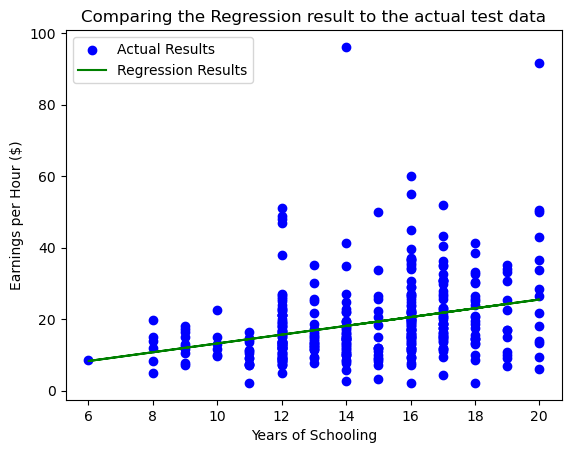

In [57]:
plt.title('Comparing the Regression result to the actual test data')

plt.scatter(linear_x_test, y_test, color ='b', label = 'Actual Results')
plt.plot(linear_x_test, y_pred, color ='g', label = 'Regression Results')

plt.ylabel('Earnings per Hour ($)')
plt.xlabel('Years of Schooling')

plt.legend()

plt.show()

In [58]:
residuals = y_pred - y_test

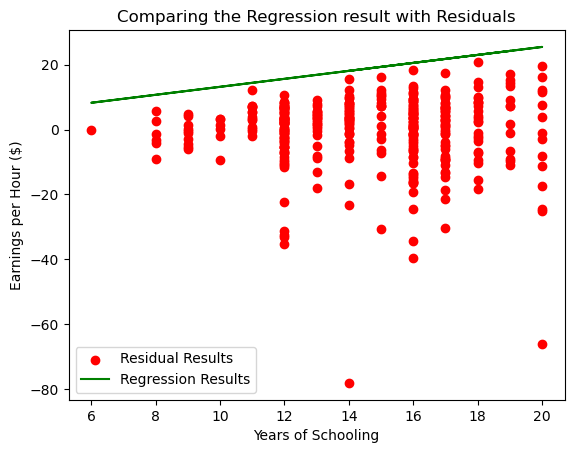

In [59]:
plt.title('Comparing the Regression result with Residuals')

plt.scatter(linear_x_test, residuals, color ='r', label = 'Residual Results')
plt.plot(linear_x_test, y_pred, color ='g', label = 'Regression Results')

plt.ylabel('Earnings per Hour ($)')
plt.xlabel('Years of Schooling')

plt.legend()

plt.show()

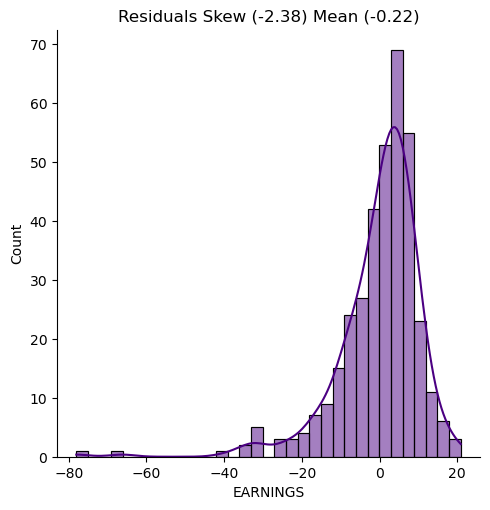

In [60]:
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

The mean is close to zero, but the skew isn't, I suppose its not a normalized distribution

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [61]:
multi_regression = LinearRegression()

In [62]:
multi_regression.fit(x_train, y_train)

LinearRegression()

In [63]:
multi_regression.intercept_

-12.503061289722694

In [64]:
multi_regression.score(x_train, y_train)

0.10439322588832778

In [65]:
multi_regression.score(x_test, y_test)

0.14388990780548405

### Evaluate the Coefficients of the Model

In [66]:
multi_coef = pd.DataFrame(data=multi_regression.coef_, index = x_train.columns, columns = ['Coefficient'])
multi_coef

,Coefficient
S,1.75
EXP,0.88


### Analyse the Estimated Values & Regression Residuals

In [67]:
y_pred_multi = multi_regression.predict(x_test)

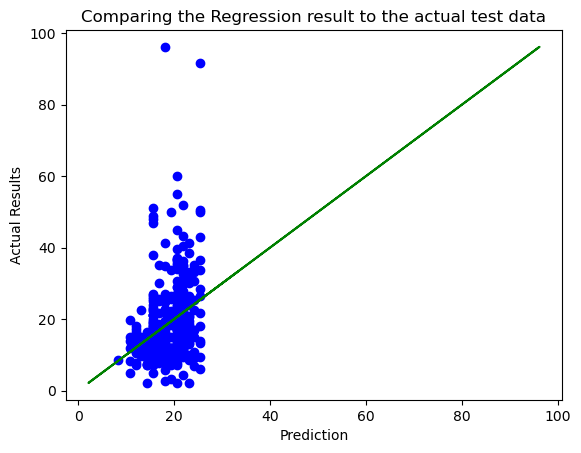

In [68]:
plt.title('Comparing the Regression result to the actual test data')

plt.scatter(y_pred, y_test, color ='b')
plt.plot( y_test, y_test, color ='g')

plt.ylabel('Actual Results')
plt.xlabel('Prediction')

plt.show()

In [69]:
residuals = y_pred_multi - y_test

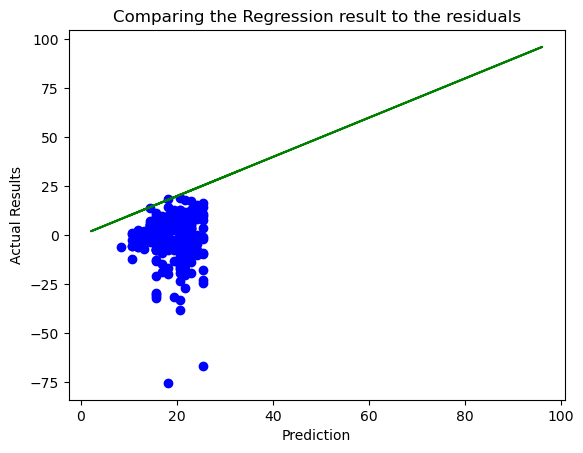

In [70]:
plt.title('Comparing the Regression result to the residuals')

plt.scatter(y_pred, residuals, color ='b')
plt.plot( y_test, y_test, color ='g')

plt.ylabel('Actual Results')
plt.xlabel('Prediction')

plt.show()

I'm pretty sure this model doesn't work, but I don't get it anyway, bye:v

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [136]:
example = pd.DataFrame.from_dict({'S':[16],'EXP':[5],})
prediction = multi_regression.predict(example)[0]
print(f"According to the model, someone with a bachelor's degree (12+4) years of schooling and 5 years work experience can earn ${prediction:.2f}/hour in 2011")

According to the model, someone with a bachelor's degree (12+4) years of schooling and 5 years work experience can earn $19.84/hour in 2011


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

I'm not adding any extra analysis since I can barely make a good model using the given exercise. But I think educational qualifications, marital status, Employment Category, and ASVAB scores can help improve the regression.